# THE SPARKS FOUNDATION
# GRIPAPR21 
# TASK 01
# BY: AMRIT UDASI
# #INTERNSHIP

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
print(data.shape)

(25, 2)


In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


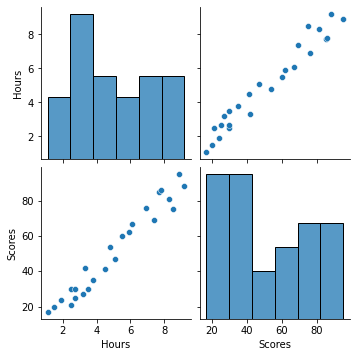

In [10]:
sns.pairplot(data)

In [37]:
import cufflinks as cf
cf.go_offline()

In [38]:
data["Scores"].iplot(kind="hist")

In [11]:
from sklearn.model_selection import train_test_split 

In [13]:
X=data[["Hours"]]
y=data[["Scores"]]

In [14]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm=LinearRegression() #creating instance

In [17]:
lm.fit(X_train,y_train)  

LinearRegression()

In [18]:
lm.coef_ 

array([[9.96651548]])

In [19]:
lm.intercept_

array([2.10249307])

In [20]:
m=lm.coef_
c=lm.intercept_

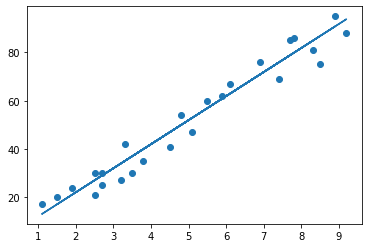

In [21]:
line=m*X+c
plt.scatter(X,y)
plt.plot(X,line)

In [22]:
pred=lm.predict(X_test)

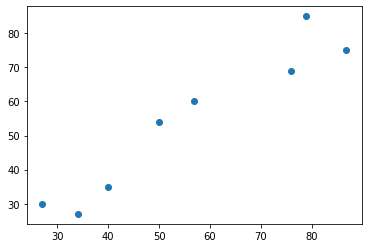

In [23]:
plt.scatter(pred,y_test)

In [24]:
#comapring actual vs predicted

In [25]:
y_test

,Scores
16,30
10,85
22,35
19,69
7,60
21,54
2,27
3,75


In [26]:
q=y_test.reset_index().drop("index",axis=1)
q

,Scores
0,30
1,85
2,35
3,69
4,60
5,54
6,27
7,75


In [32]:
pred1=pd.DataFrame(pred,columns=["predicted score"])

In [33]:
#comapring predicted vs actual
pd.concat([pred1,q],axis=1)

,predicted score,Scores
0,27.018782,30
1,78.844662,85
2,39.975252,35
3,75.854708,69
4,56.918328,60
5,49.941767,54
6,33.995343,27
7,86.817875,75


# Model evaluation


In [28]:
from sklearn import metrics
x=metrics.explained_variance_score(y_test,pred)
x=x*100
print(f"Accuracy is {x:.2f}%")

Accuracy is 90.77%


# what will be predicted score if a student studies for 9.25hrs/ day

In [29]:
h=9.25
s=lm.predict([[h]])
print(f"The predicted score if a student studies for 9.25hrs/day is {s[0][0]:.2f}")

The predicted score if a student studies for 9.25hrs/day is 94.29
